In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# Read the contents of '50_Startups.csv'
data = pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
# Integer based location
x = data.iloc[:, : -1].values
y = data.iloc[:, -1].values
x, y

(array([[165349.2, 136897.8, 471784.1, 'New York'],
        [162597.7, 151377.59, 443898.53, 'California'],
        [153441.51, 101145.55, 407934.54, 'Florida'],
        [144372.41, 118671.85, 383199.62, 'New York'],
        [142107.34, 91391.77, 366168.42, 'Florida'],
        [131876.9, 99814.71, 362861.36, 'New York'],
        [134615.46, 147198.87, 127716.82, 'California'],
        [130298.13, 145530.06, 323876.68, 'Florida'],
        [120542.52, 148718.95, 311613.29, 'New York'],
        [123334.88, 108679.17, 304981.62, 'California'],
        [101913.08, 110594.11, 229160.95, 'Florida'],
        [100671.96, 91790.61, 249744.55, 'California'],
        [93863.75, 127320.38, 249839.44, 'Florida'],
        [91992.39, 135495.07, 252664.93, 'California'],
        [119943.24, 156547.42, 256512.92, 'Florida'],
        [114523.61, 122616.84, 261776.23, 'New York'],
        [78013.11, 121597.55, 264346.06, 'California'],
        [94657.16, 145077.58, 282574.31, 'New York'],
        [91749.1

In [5]:
# Import necessary libraries for one-hot encoding, scaling, column transformation and splitting up of data into training and test sets
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [6]:
# Seperate predictors and target variable
x = data.drop(columns="Profit")
y = data["Profit"]

In [9]:
# Identify categorical and numerical columns
categorical_features = ["State"]
numerical_features = ["R&D Spend", "Administration", "Marketing Spend"]

In [10]:
# Create a ColumnTransformer to handle preprocessing
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first"), categorical_features),
    ("scaler", StandardScaler(), numerical_features)
])

# Apply the transformation
x_preprocessed = preprocessor.fit_transform(x)
x_preprocessed

array([[ 0.00000000e+00,  1.00000000e+00,  2.01641149e+00,
         5.60752915e-01,  2.15394309e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.95586034e+00,
         1.08280658e+00,  1.92360040e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.75436374e+00,
        -7.28257028e-01,  1.62652767e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.55478369e+00,
        -9.63646307e-02,  1.42221024e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.50493720e+00,
        -1.07991935e+00,  1.28152771e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.27980001e+00,
        -7.76239071e-01,  1.25421046e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.34006641e+00,
         9.32147208e-01, -6.88149930e-01],
       [ 1.00000000e+00,  0.00000000e+00,  1.24505666e+00,
         8.71980011e-01,  9.32185978e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.03036886e+00,
         9.86952101e-01,  8.30886909e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.09181921e+00,
        -4.56640246e-01

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2)
X_train, X_test, y_train, y_test

(array([[ 0.        ,  0.        , -0.98957702, -0.10090022, -0.31578588],
        [ 0.        ,  1.        ,  0.1027236 ,  1.16918609,  0.73278779],
        [ 0.        ,  1.        ,  0.27944165,  1.15983657, -1.74312698],
        [ 0.        ,  1.        , -0.03551899,  0.23506854,  1.17427116],
        [ 0.        ,  0.        , -1.13430539,  1.20641936, -1.50907418],
        [ 0.        ,  1.        , -1.60035036,  0.10125394, -1.72739998],
        [ 0.        ,  1.        , -1.28113364,  0.21768152, -1.44960468],
        [ 0.        ,  1.        , -0.17860854,  1.14245677, -0.85813366],
        [ 1.        ,  0.        ,  1.24505666,  0.87198001,  0.93218598],
        [ 1.        ,  0.        , -0.13620072, -0.56221127,  0.77434891],
        [ 0.        ,  1.        ,  0.0731146 , -0.79546917, -0.5819393 ],
        [ 1.        ,  0.        , -1.59341322, -0.19932174,  0.71112247],
        [ 1.        ,  0.        ,  1.01718075,  1.26919939,  0.37574227],
        [ 1.        ,  0.

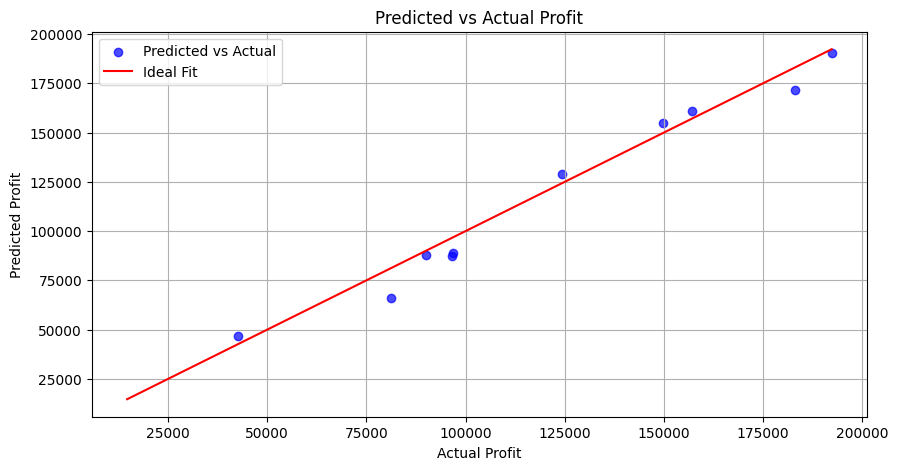

In [12]:
# Apply linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Predicted vs Actual Profit
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Ideal Fit')
plt.title('Predicted vs Actual Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.legend()
plt.grid(True)
plt.show()



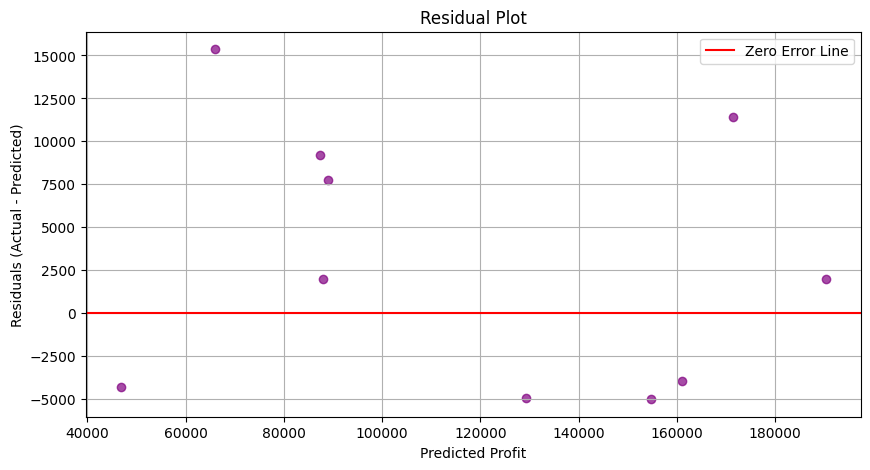

In [13]:
# Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred, residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='red', label='Zero Error Line')
plt.title('Residual Plot')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.show()